In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
%matplotlib inline
start_time = datetime.now()

In [2]:
# data = pd.read_csv('card transactions.csv', converters={'Merchnum': lambda x: str(x)})

In [3]:
data = pd.read_csv('card transactions.csv')

In [4]:
data.head()

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
0,1,5142190439,1/1/10,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,5142183973,1/1/10,61003026333,SERVICE MERCHANDISE #81,MA,1803.0,P,31.42,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,5142131721,1/1/10,4503082993600,OFFICE DEPOT #191,MD,20706.0,P,178.49,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,5142148452,1/1/10,5509006296254,FEDEX SHP 12/28/09 AB#,TN,38118.0,P,3.62,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,5142190439,1/1/10,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# I notice that there are some sometimes blank columns read so I drop them
# I also want the Date field to be a date time
data.dropna(how='all', axis=1,inplace=True)
data['Date'] = pd.to_datetime(data['Date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96753 entries, 0 to 96752
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Recnum             96753 non-null  int64         
 1   Cardnum            96753 non-null  int64         
 2   Date               96753 non-null  datetime64[ns]
 3   Merchnum           93378 non-null  object        
 4   Merch description  96753 non-null  object        
 5   Merch state        95558 non-null  object        
 6   Merch zip          92097 non-null  float64       
 7   Transtype          96753 non-null  object        
 8   Amount             96753 non-null  float64       
 9   Fraud              96753 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 7.4+ MB


In [6]:
data.shape

(96753, 10)

In [7]:
numerics = ['Date','Amount']
categoricals = ['Recnum','Cardnum','Merchnum','Merch description','Merch state','Merch zip','Transtype','Fraud']

In [8]:
def count_zeros(data):
    count=0
    for i in data:
        if i==0:
            count+=1
    return count

In [9]:
statistics_of_data1 = []
for col in numerics:
    statistics_of_data1.append((col,
                             data[col].notnull().sum(),
                             f'{data[col].notnull().sum()/data.shape[0]*100}%',
                             count_zeros(data[col]),
                             data[col].min(),
                             data[col].max(),
                                data[col].mean(),
                             data[col].mode()[0],
                                data[col].std()
                             ))

stats_df = pd.DataFrame(statistics_of_data1, columns=['Field Name','# Records With Values', '% Populated', '# Zeros','Min', 'Max','Mean',
                                                      'Most Common','Stdev'])
stats_df.to_csv('numerics.csv')
stats_df

,Field Name,# Records With Values,% Populated,# Zeros,Min,Max,Mean,Most Common,Stdev
0,Date,96753,100.0%,0,2010-01-01 00:00:00,2010-12-31 00:00:00,2010-06-25 22:21:52.480232960,2010-02-28 00:00:00,98 days 21:38:57.704372484
1,Amount,96753,100.0%,0,0.01,3102045.53,427.885677,3.62,10006.140302


In [10]:
statistics_of_data = []
for col in categoricals:
    statistics_of_data.append((col,
                             data[col].notnull().sum(),
                             f'{data[col].notnull().sum()/data.shape[0]*100}%',
                             count_zeros(data[col]),
                             data[col].nunique(),
                             data[col].mode()[0],

                             ))
stats_df = pd.DataFrame(statistics_of_data, columns=['Field Name', '# Records With Values', '% Populated', '# Zeros','# Unique Values', 'Most Common',])
stats_df.to_csv('categoricals.csv')
stats_df

,Field Name,# Records With Values,% Populated,# Zeros,# Unique Values,Most Common
0,Recnum,96753,100.0%,0,96753,1
1,Cardnum,96753,100.0%,0,1645,5142148452
2,Merchnum,93378,96.51173607019938%,0,13091,930090121224
3,Merch description,96753,100.0%,0,13126,GSA-FSS-ADV
4,Merch state,95558,98.76489617892985%,0,227,TN
5,Merch zip,92097,95.1877461163995%,0,4567,38118.0
6,Transtype,96753,100.0%,0,4,P
7,Fraud,96753,100.0%,95694,2,0


In [11]:
# data[categoricals] = data[categoricals].astype(str)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96753 entries, 0 to 96752
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Recnum             96753 non-null  int64         
 1   Cardnum            96753 non-null  int64         
 2   Date               96753 non-null  datetime64[ns]
 3   Merchnum           93378 non-null  object        
 4   Merch description  96753 non-null  object        
 5   Merch state        95558 non-null  object        
 6   Merch zip          92097 non-null  float64       
 7   Transtype          96753 non-null  object        
 8   Amount             96753 non-null  float64       
 9   Fraud              96753 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 7.4+ MB


In [12]:
data.describe(include='all')

/var/folders/tv/j28cf6c114v0ms8psrzsx1200000gp/T/ipykernel_2482/1336221646.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data.describe(include='all')


,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud
count,96753.000000,9.675300e+04,96753,93378,96753,95558,92097.000000,96753,9.675300e+04,96753.000000
unique,NaN,NaN,365,13091,13126,227,NaN,4,NaN,NaN
top,NaN,NaN,2010-02-28 00:00:00,930090121224,GSA-FSS-ADV,TN,NaN,P,NaN,NaN
freq,NaN,NaN,684,9310,1688,12035,NaN,96398,NaN,NaN
first,NaN,NaN,2010-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,2010-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,48377.000000,5.142202e+09,NaN,NaN,NaN,NaN,44706.596740,NaN,4.278857e+02,0.010945
std,27930.329635,5.567084e+04,NaN,NaN,NaN,NaN,28369.537945,NaN,1.000614e+04,0.104047
min,1.000000,5.142110e+09,NaN,NaN,NaN,NaN,1.000000,NaN,1.000000e-02,0.000000
25%,24189.000000,5.142152e+09,NaN,NaN,NaN,NaN,20855.000000,NaN,3.348000e+01,0.000000


In [13]:
data.head(10)

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud
0,1,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0
1,2,5142183973,2010-01-01,61003026333,SERVICE MERCHANDISE #81,MA,1803.0,P,31.42,0
2,3,5142131721,2010-01-01,4503082993600,OFFICE DEPOT #191,MD,20706.0,P,178.49,0
3,4,5142148452,2010-01-01,5509006296254,FEDEX SHP 12/28/09 AB#,TN,38118.0,P,3.62,0
4,5,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0
5,6,5142149874,2010-01-01,5509006296254,FEDEX SHP 12/22/09 AB#,TN,38118.0,P,3.67,0
6,7,5142189277,2010-01-01,5509006296254,FEDEX SHP 12/28/09 AB#,TN,38118.0,P,3.62,0
7,8,5142191182,2010-01-01,6098208200062,MIAMI COMPUTER SUPPLY,OH,45429.0,P,230.32,0
8,9,5142258629,2010-01-01,602608969534,FISHER SCI ATL,GA,30091.0,P,62.11,0
9,10,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0


In [14]:
data.describe(include = 'all',datetime_is_numeric=True)

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud
count,96753.000000,9.675300e+04,96753,93378,96753,95558,92097.000000,96753,9.675300e+04,96753.000000
unique,NaN,NaN,NaN,13091,13126,227,NaN,4,NaN,NaN
top,NaN,NaN,NaN,930090121224,GSA-FSS-ADV,TN,NaN,P,NaN,NaN
freq,NaN,NaN,NaN,9310,1688,12035,NaN,96398,NaN,NaN
mean,48377.000000,5.142202e+09,2010-06-25 22:21:52.480232960,NaN,NaN,NaN,44706.596740,NaN,4.278857e+02,0.010945
min,1.000000,5.142110e+09,2010-01-01 00:00:00,NaN,NaN,NaN,1.000000,NaN,1.000000e-02,0.000000
25%,24189.000000,5.142152e+09,2010-04-03 00:00:00,NaN,NaN,NaN,20855.000000,NaN,3.348000e+01,0.000000
50%,48377.000000,5.142196e+09,2010-06-27 00:00:00,NaN,NaN,NaN,38118.000000,NaN,1.379800e+02,0.000000
75%,72565.000000,5.142246e+09,2010-09-12 00:00:00,NaN,NaN,NaN,63103.000000,NaN,4.282000e+02,0.000000
max,96753.000000,5.142847e+09,2010-12-31 00:00:00,NaN,NaN,NaN,99999.000000,NaN,3.102046e+06,1.000000


In [15]:
data.count() * 100 / len(data)

Recnum               100.000000
Cardnum              100.000000
Date                 100.000000
Merchnum              96.511736
Merch description    100.000000
Merch state           98.764896
Merch zip             95.187746
Transtype            100.000000
Amount               100.000000
Fraud                100.000000
dtype: float64

In [16]:
%%time
import pandas_profiling
profile = pandas_profiling.ProfileReport(data)
profile.to_file('Data Summary.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

CPU times: user 10.2 s, sys: 898 ms, total: 11.1 s
Wall time: 13.5 s


In [17]:
goods = data[data['Fraud'] == 0]
bads = data[data['Fraud'] == 1]
print("#goods:", len(goods), "    #bads:", len(bads))

#goods: 95694     #bads: 1059


In [18]:
goods.head()

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud
0,1,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0
1,2,5142183973,2010-01-01,61003026333,SERVICE MERCHANDISE #81,MA,1803.0,P,31.42,0
2,3,5142131721,2010-01-01,4503082993600,OFFICE DEPOT #191,MD,20706.0,P,178.49,0
3,4,5142148452,2010-01-01,5509006296254,FEDEX SHP 12/28/09 AB#,TN,38118.0,P,3.62,0
4,5,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0


In [19]:
overall_fraud_rate = len(bads) / len(data)
print(overall_fraud_rate)

0.010945397041952187


In [20]:
len(data['Recnum'].unique())

96753

In [21]:
len(data['Cardnum'].unique())

1645

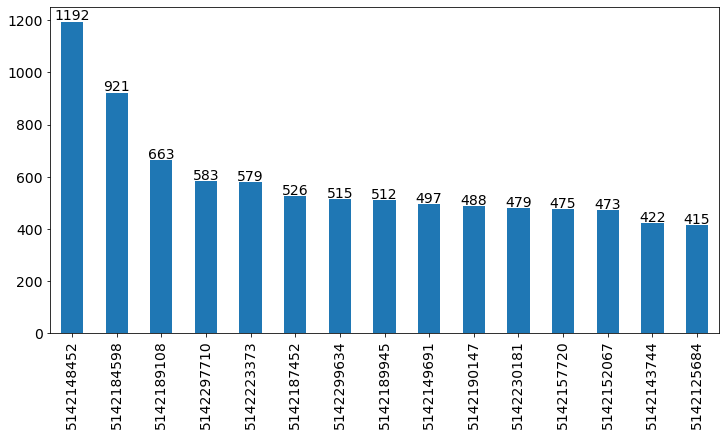

In [22]:
plt.rcParams['font.size'] =  14
plt.rcParams["figure.figsize"] = (12,6)
data['Cardnum'].value_counts().head(15).plot(kind = 'bar')
for i,j in enumerate(data['Cardnum'].value_counts().head(15)):
    plt.text(i,j*1.01,j,ha = 'center', fontsize = 14)
# plt.yscale('log')
# plt.ylim(bottom = 100)

In [23]:
len(data['Date'].unique())

365

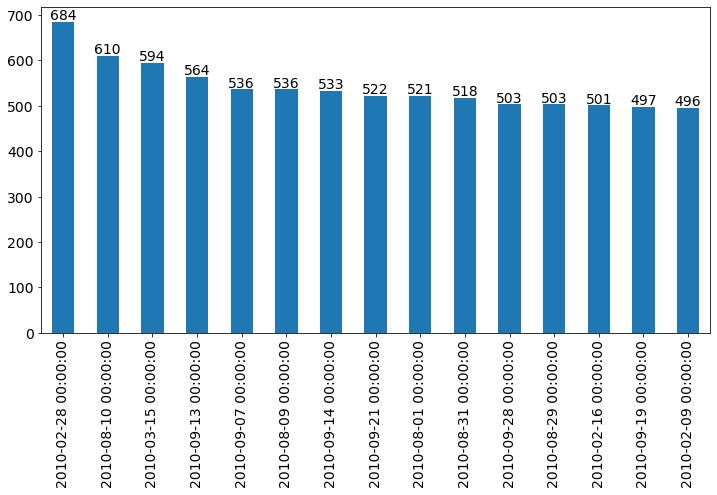

In [24]:
data['Date'].value_counts().head(15).plot(kind = 'bar')
for i,j in enumerate(data['Date'].value_counts().head(15)):
    plt.text(i,j*1.01,j,ha = 'center', fontsize = 14)

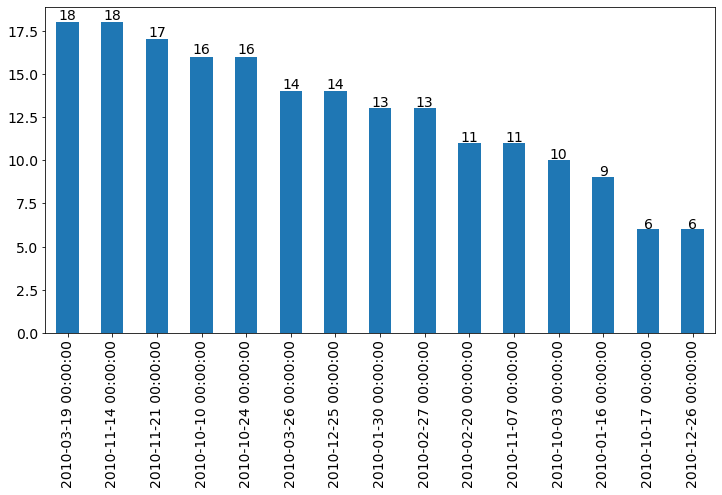

In [25]:
data['Date'].value_counts().tail(15).plot(kind='bar')
for i,j in enumerate(data['Date'].value_counts().tail(15)):
    plt.text(i,j*1.01,j,ha = 'center', fontsize = 14)

In [26]:
count_day = data.groupby('Date').count()
count_day.head(20)

,Recnum,Cardnum,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud
Date,,,,,,,,,
2010-01-01,51,51,51,51,51,51,51,51,51
2010-01-02,29,29,29,29,29,10,29,29,29
2010-01-03,159,159,153,159,157,153,159,159,159
2010-01-04,229,229,221,229,226,221,229,229,229
2010-01-05,309,309,286,309,299,297,309,309,309
2010-01-06,330,330,317,330,328,321,330,330,330
2010-01-07,307,307,292,307,305,294,307,307,307
2010-01-08,104,104,104,104,104,104,104,104,104
2010-01-09,19,19,19,19,19,19,19,19,19


<AxesSubplot:title={'center':'Daily Transactions'}, xlabel='Date'>

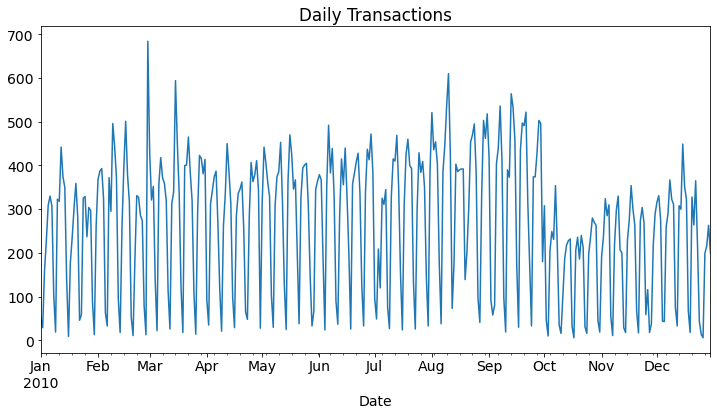

In [27]:
data.assign(trx = np.ones(len(data))).set_index(data['Date']).resample(timedelta(days = 1))\
    .count()[:-1].trx.plot(title = 'Daily Transactions')

Text(0.5, 1.0, 'Weekly Transactions')

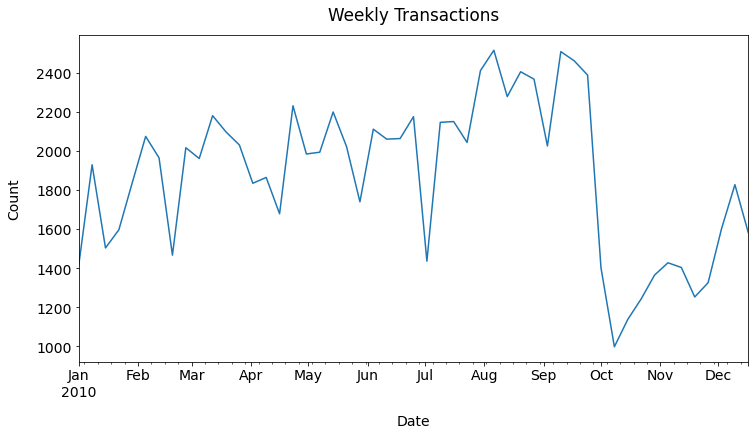

In [28]:
week_plot = data['Date'].value_counts().groupby(pd.Grouper(freq = '7D')).sum()

week_plot.head(51).plot()
plt.xlabel('Date', labelpad = 15)
plt.ylabel('Count', labelpad = 15)
# plt.rcParams.update({'figure.figsize':(8,6)})
plt.title('Weekly Transactions', pad = 15)

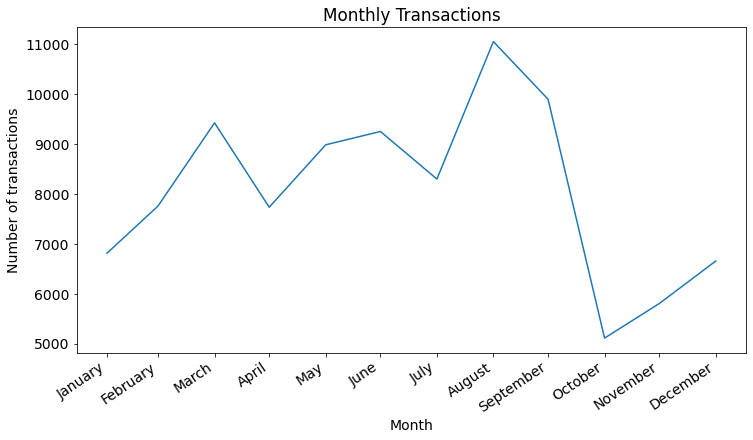

In [29]:
monthly_data = data.groupby(pd.Grouper(key='Date',freq='M')).size()
plt.plot(monthly_data.index, monthly_data.values)
plt.xlabel('Month')
plt.ylabel('Number of transactions')
plt.title('Monthly Transactions')
month_labels = monthly_data.index.strftime('%B')
plt.xticks(monthly_data.index, month_labels, rotation=34, ha='right')
plt.show()

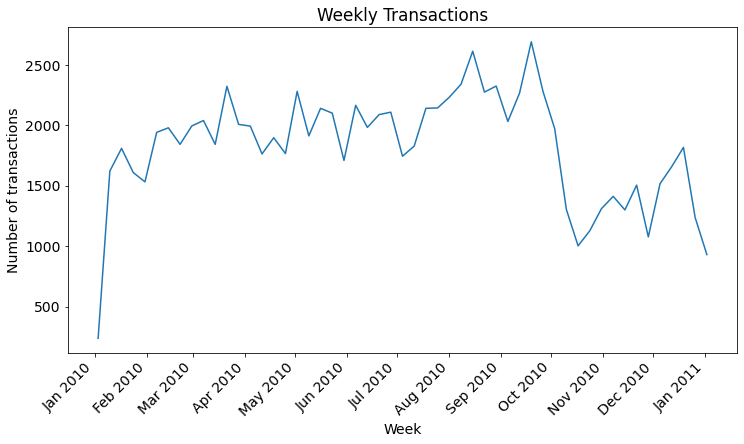

In [30]:
import matplotlib.dates as mdates
weekly_data = data.groupby(pd.Grouper(key='Date',freq='W')).size()
plt.plot(weekly_data.index, weekly_data.values)
plt.xlabel('Week')
plt.ylabel('Number of transactions')
plt.title('Weekly Transactions')
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=45,ha='right')
plt.show()

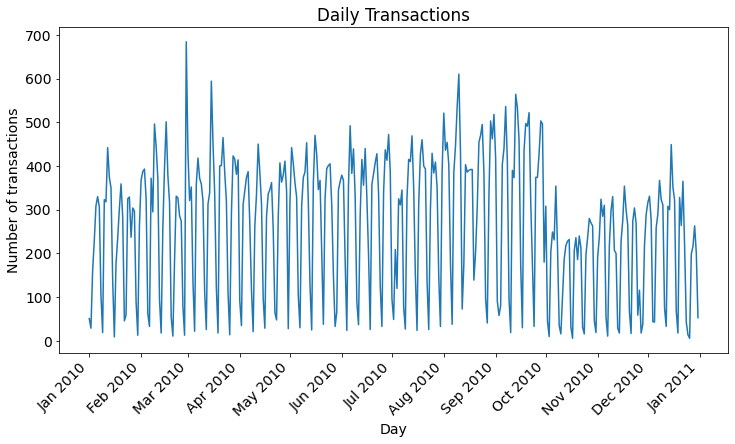

In [31]:
import matplotlib.dates as mdates
daily_data = data.groupby(pd.Grouper(key='Date',freq='D')).size()
plt.plot(daily_data.index, daily_data.values)
plt.xlabel('Day')
plt.ylabel('Number of transactions')
plt.title('Daily Transactions')
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=45,ha='right')

plt.show()

In [32]:
len(data['Merchnum'].unique())

13092

In [33]:
data['Merchnum'].value_counts().head(10)

930090121224     9310
5509006296254    2131
9900020006406    1714
602608969534     1092
4353000719908    1020
410000971343      982
9918000409955     956
5725000466504     872
9108234610000     817
602608969138      783
Name: Merchnum, dtype: int64

(100, 10751.574797112271)

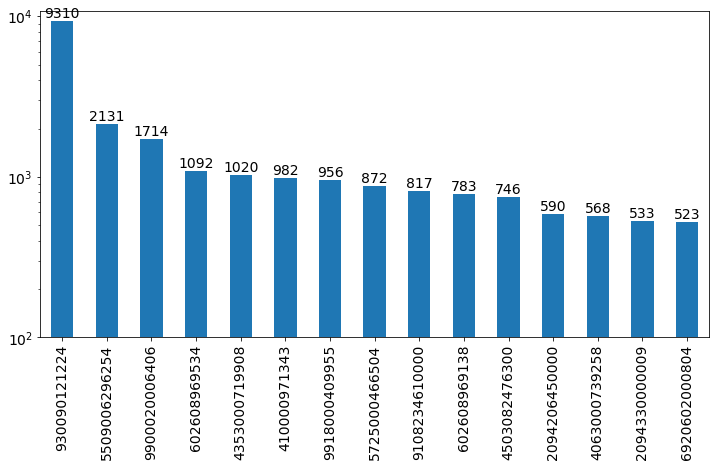

In [34]:
data['Merchnum'].value_counts().head(15).plot(kind = 'bar')
for i,j in enumerate(data['Merchnum'].value_counts().head(15)):
    plt.text(i,j*1.05,j,ha = 'center', fontsize = 14)
plt.yscale('log')
plt.ylim(bottom = 100)

In [35]:
len(data['Merch description'].unique())

13126

In [36]:
data['Merch description'].value_counts()

GSA-FSS-ADV                 1688
SIGMA-ALDRICH               1635
STAPLES #941                1174
FISHER SCI ATL              1093
MWI*MICRO WAREHOUSE          958
                            ... 
HBD INC                        1
SALES MARKETING MAGAZINE       1
PATTERSON'S TRUE VALUE         1
FLOPPY COPY                    1
BEST BUY      00001610         1
Name: Merch description, Length: 13126, dtype: int64

In [37]:
len(data['Merch state'].unique())

228

In [38]:
data['Merch state'].value_counts()

TN     12035
VA      7872
CA      6817
IL      6508
MD      5398
       ...  
495        1
376        1
458        1
546        1
116        1
Name: Merch state, Length: 227, dtype: int64

In [39]:
len(data['Merch zip'].unique())

4568

In [40]:
data['Merch zip'].value_counts()

38118.0    11868
63103.0     1650
8701.0      1267
22202.0     1250
60061.0     1221
           ...  
89125.0        1
46225.0        1
27025.0        1
6076.0         1
36043.0        1
Name: Merch zip, Length: 4567, dtype: int64

In [41]:
data['Transtype'].value_counts()

P    96398
A      181
D      173
Y        1
Name: Transtype, dtype: int64

In [42]:
data['Amount'].value_counts()

3.62       4283
3.67       1620
3.74        913
3.80        827
4.37        378
           ... 
949.29        1
2303.00       1
303.72        1
183.36        1
554.64        1
Name: Amount, Length: 34909, dtype: int64

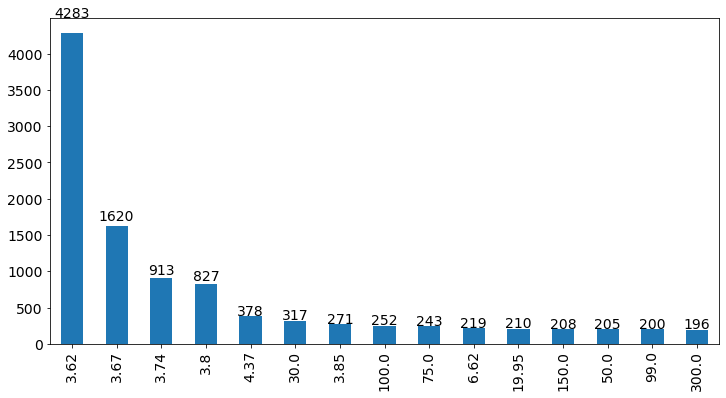

In [43]:
data['Amount'].value_counts().head(15).plot(kind = 'bar')
for i,j in enumerate(data['Amount'].value_counts().head(15)):
    plt.text(i,j*1.05,j,ha = 'center', fontsize = 14)

(0.1, 171768.2728626341)

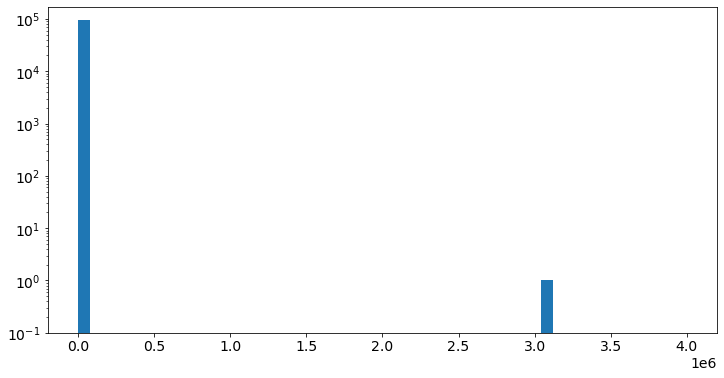

In [44]:
plt.hist(data['Amount'],bins=50,range=[0,4000000])
plt.yscale('log')
plt.ylim(bottom = .1)

In [45]:
data['Amount'].max()

3102045.53

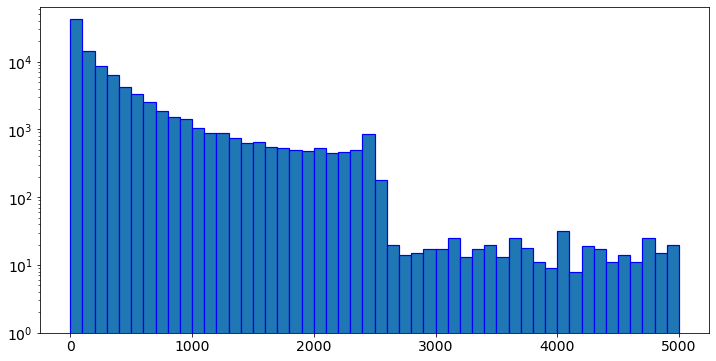

In [46]:
plt.hist(data['Amount'],bins=50,range=[0,5000],edgecolor='blue',linewidth=1.2)
plt.yscale('log')
plt.ylim(bottom = 1)
plt.savefig('amount distribution')

In [47]:
data['Fraud'].value_counts()

0    95694
1     1059
Name: Fraud, dtype: int64

## OK, that's what the raw data looks like. Now let's remove the exclusions and explore the data a bit more

In [48]:
data['DOW'] = data['Date'].dt.day_name()
print(data.shape)
print(data['Amount'].max())

(96753, 11)
3102045.53


In [49]:
# remove exclusions: only keep the type P's and remove one high transaction outlier
temp = data[data['Transtype'] == 'P']
data = temp[temp['Amount'] <= 3000000]
data = data.reset_index(drop=True)
print(data.shape)
print(data['Amount'].max())

(96397, 11)
47900.0


In [50]:
data.head()

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud,DOW
0,1,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0,Friday
1,2,5142183973,2010-01-01,61003026333,SERVICE MERCHANDISE #81,MA,1803.0,P,31.42,0,Friday
2,3,5142131721,2010-01-01,4503082993600,OFFICE DEPOT #191,MD,20706.0,P,178.49,0,Friday
3,4,5142148452,2010-01-01,5509006296254,FEDEX SHP 12/28/09 AB#,TN,38118.0,P,3.62,0,Friday
4,5,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0,Friday


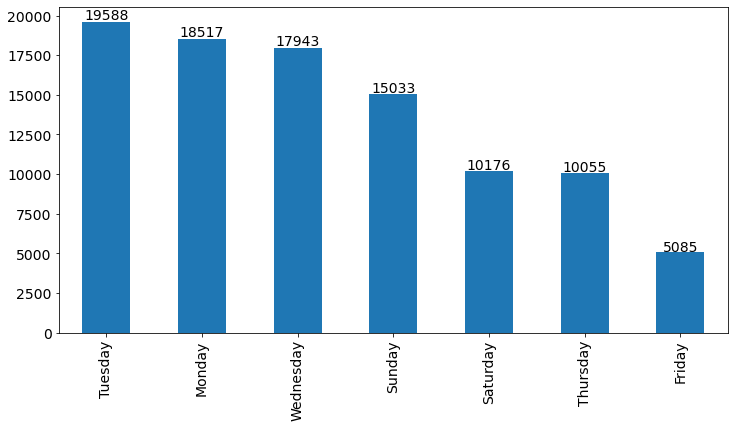

In [51]:
data['DOW'].value_counts().plot(kind = 'bar')
for i,j in enumerate(data['DOW'].value_counts().head(15)):
    plt.text(i,j*1.01,j,ha = 'center', fontsize = 14)

In [52]:
goods = data[data['Fraud'] == 0]
bads = data[data['Fraud'] == 1]
print("#goods:", len(goods), "    #bads:", len(bads))

#goods: 95338     #bads: 1059


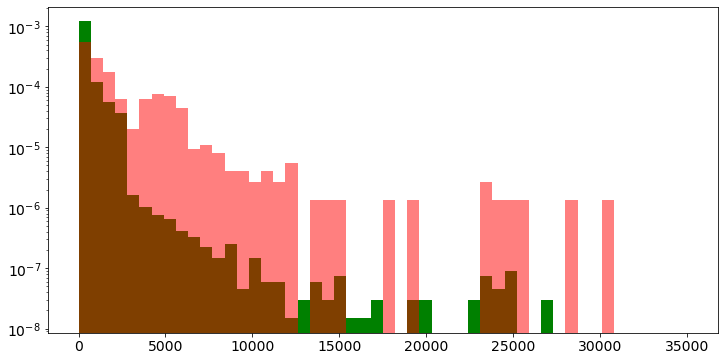

In [53]:
plt.hist(goods['Amount'],bins=50,range=[0,35000], density = True, color = 'green')
plt.hist(bads['Amount'],bins=50,range=[0,35000], density = True, color = 'red', alpha = .5)
plt.yscale('log')

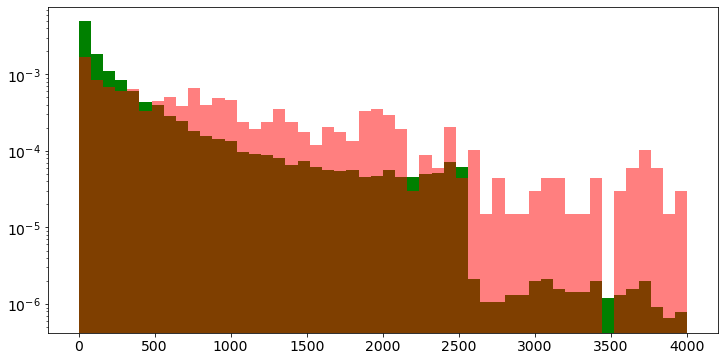

In [54]:
plt.hist(goods['Amount'],bins=50,range=[0,4000], density = True, color = 'green')
plt.hist(bads['Amount'],bins=50,range=[0,4000], density = True, color = 'red', alpha = .5)
plt.yscale('log')

<AxesSubplot:title={'center':'Daily Transactions'}, xlabel='Date'>

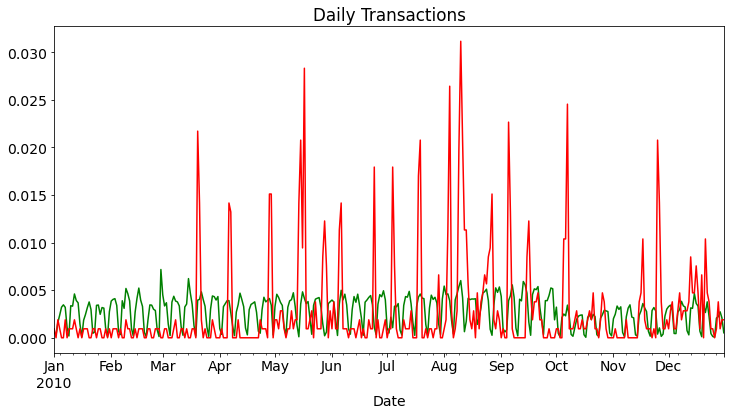

In [55]:
ngoods = len(goods)
nbads = len(bads)
goods_series = goods.assign(trx = np.ones(ngoods)).set_index(goods['Date']).resample(timedelta(days = 1)).count().trx
norm_goods_series = goods_series / ngoods
norm_goods_series.plot(title = 'Daily Transactions', color = 'green')
bads_series = bads.assign(trx = np.ones(nbads)).set_index(bads['Date']).resample(timedelta(days = 1)).count().trx
norm_bads_series = bads_series / nbads
norm_bads_series.plot(color = 'red')

<AxesSubplot:title={'center':'Weeky Transactions'}, xlabel='Date'>

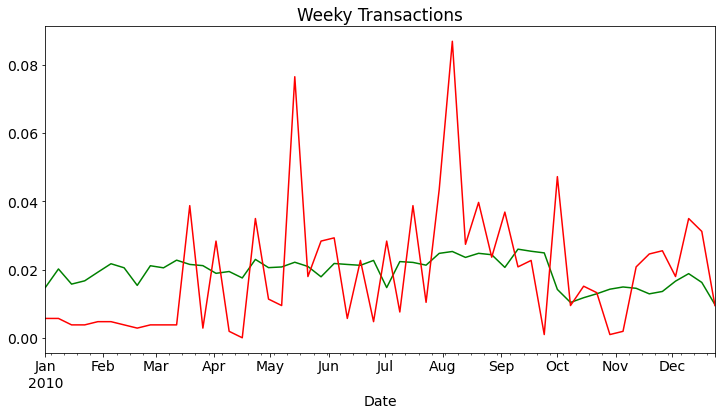

In [56]:
goods_series = goods.assign(trx = np.ones(ngoods)).set_index(goods['Date']).resample(timedelta(days = 7)).count().trx
norm_goods_series = goods_series / ngoods
norm_goods_series.head(52).plot(title = 'Weeky Transactions', color = 'green')
bads_series = bads.assign(trx = np.ones(nbads)).set_index(bads['Date']).resample(timedelta(days = 7)).count().trx
norm_bads_series = bads_series / nbads
norm_bads_series.head(52).plot(color = 'red')

<AxesSubplot:title={'center':'Approximately Monthly Transactions'}, xlabel='Date'>

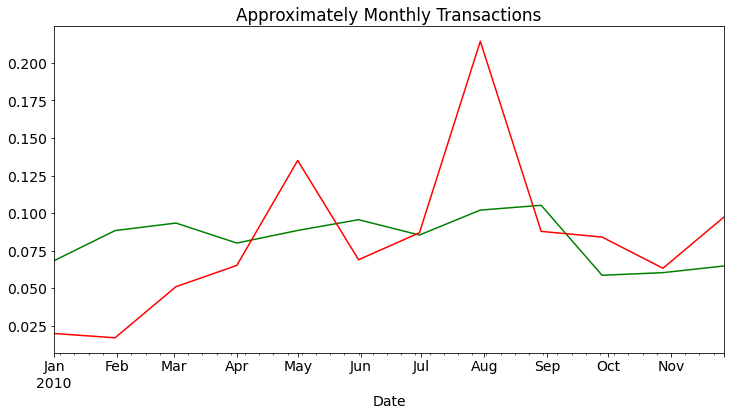

In [57]:
goods_series = goods.assign(trx = np.ones(ngoods)).set_index(goods['Date']).resample(timedelta(days = 30)).count().trx
norm_goods_series = goods_series / ngoods
norm_goods_series.head(12).plot(title = 'Approximately Monthly Transactions', color = 'green')
bads_series = bads.assign(trx = np.ones(nbads)).set_index(bads['Date']).resample(timedelta(days = 30)).count().trx
norm_bads_series = bads_series / nbads
norm_bads_series.head(12).plot(color = 'red')

In [58]:
# takes about 20 seconds to run
stop_time = datetime.now()
print('duration: ', stop_time - start_time)

duration:  0:00:20.400040
